In [1]:
# Import basic libraries
import numpy as np 
import pandas as pd

In [2]:
# Create lists for relevant numerical features
repayments = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_amounts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
payments = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

<b> We have learnt that Gaussian Naive Bayes is suitable for continuous data and Multinomial Naive Bayes is used for categorical data. <br>However, here we have mixed categorical and continuous numericial features. <br>To apply the Naive Bayes model, we tried 3 approaches:</b>
<ol>
    <li>Transform all features into categorical representation by data dicretization, then apply the multinomial naive bayes model on the transformed categorical features.</li>
        <li>View all the categorical encoded features as numericial features.</li>
    <li>Independently fit a gaussian NB model on the continuous part of the data and a multinomial NB model on the categorical part. Then multiply the class assignment probabilities to produced finalized predicted probabilities.
    </li>
</ol>

# Method 1 : Discretizing Continuous Feature to Categorical

## First Trial : Data Binning with Equal Intervals

In [3]:
# Import libraries and data
import seaborn as sns
sns.set_style('whitegrid')
data = pd.read_csv('data/data_clean.csv',index_col = 'ID')

### Data Discretization 

#### 1. Age

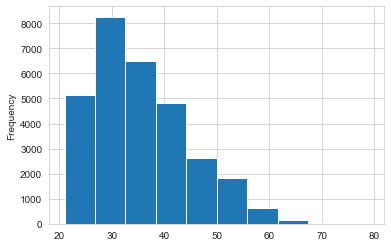

In [4]:
data['AGE'].plot(kind='hist')

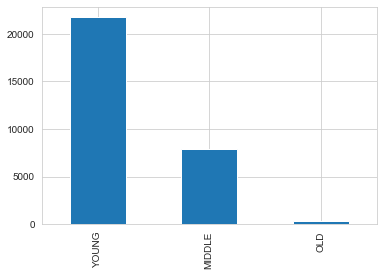

In [5]:
# binning of age
group_age=['YOUNG','MIDDLE','OLD']
data['AGE_BINNED']=pd.cut(data['AGE'],3,labels=group_age)
data['AGE_BINNED'].value_counts().plot(kind='bar')

In [6]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [7]:
data['AGE_encoded'] = le.fit_transform(data['AGE_BINNED'])

#### 2. Balance Limit

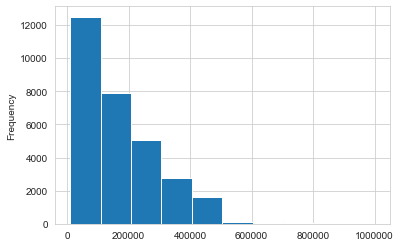

In [8]:
data['LIMIT_BAL'].plot(kind='hist')

In [9]:
pd.cut(data['LIMIT_BAL'], bins=5).value_counts()

(9010.0, 208000.0]       20378
(208000.0, 406000.0]      7818
(406000.0, 604000.0]      1725
(604000.0, 802000.0]        78
(802000.0, 1000000.0]        1
Name: LIMIT_BAL, dtype: int64

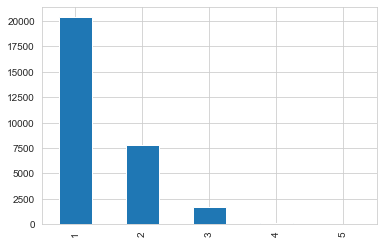

In [10]:
# binning of Balance Limit
data['LIMIT_BAL_BINNED']=pd.cut(data['LIMIT_BAL'],5,labels=range(1,6))
data['LIMIT_BAL_BINNED'].value_counts().plot(kind='bar')

#### 3. Previous Panyments

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a234e3510>,
      dtype=object)

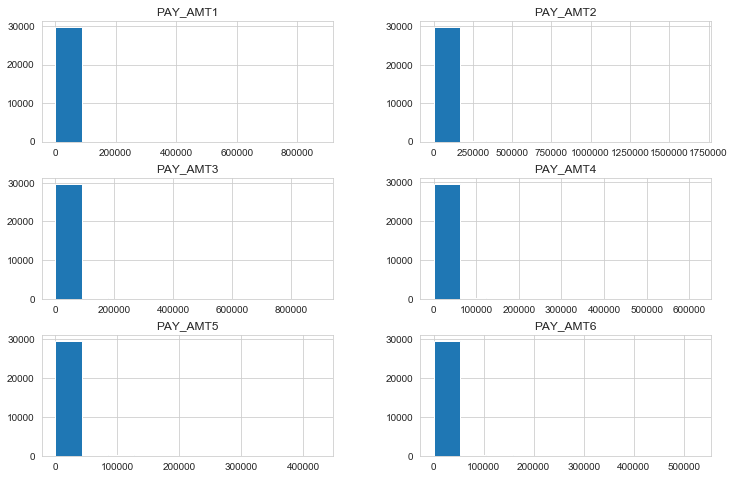

In [11]:
# histogram for preious payments
data.hist(column= payments, figsize=(12, 8))

In [12]:
pd.cut(data['PAY_AMT1'], bins=4).value_counts()

(-873.552, 218388.0]    29966
(218388.0, 436776.0]       31
(436776.0, 655164.0]        2
(655164.0, 873552.0]        1
Name: PAY_AMT1, dtype: int64

In [13]:
# binning of previous payments
for x in payments:
    data[x+'_BINNED']=pd.cut(data[x],4,labels=range(1,5))

#### 4. Bill Statements

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a242abc50>,
      dtype=object)

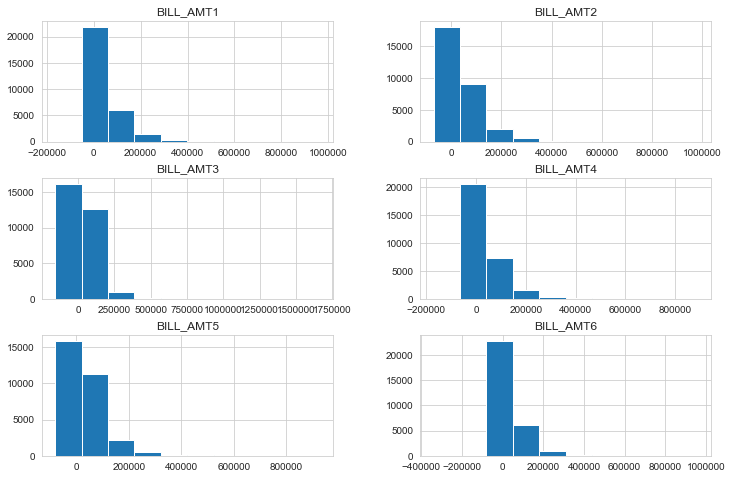

In [14]:
# histogram for bill statements
data.hist(column= bill_amounts, figsize=(12, 8))

In [15]:
pd.cut(data['BILL_AMT1'], bins=3).value_counts()

(-166710.091, 211117.0]    28671
(211117.0, 587814.0]        1317
(587814.0, 964511.0]          12
Name: BILL_AMT1, dtype: int64

In [16]:
# binning of bill statements
for x in bill_amounts:
    data[x+'_BINNED']=pd.cut(data[x],3,labels=range(1,4))

#### 5. Repayments

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a246afa50>,
      dtype=object)

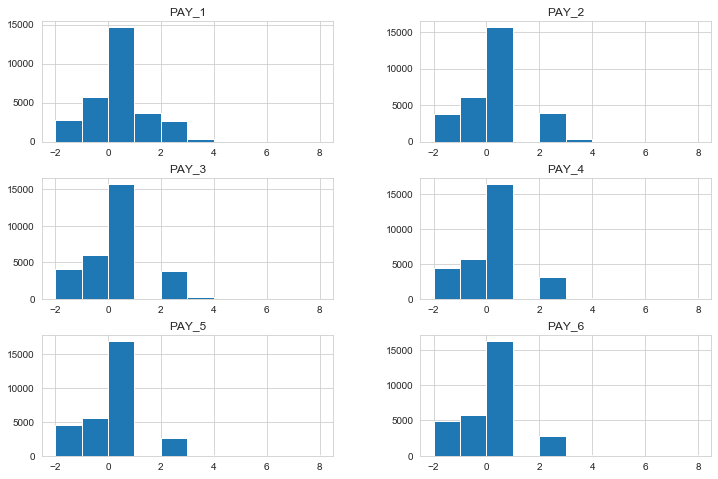

In [17]:
data.hist(column= repayments, figsize=(12, 8))

In [18]:
# MultinomialNB disallow negative input, add a constant to all repayments status value
data[repayments]=data[repayments]+9

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24ca1290>,
      dtype=object)

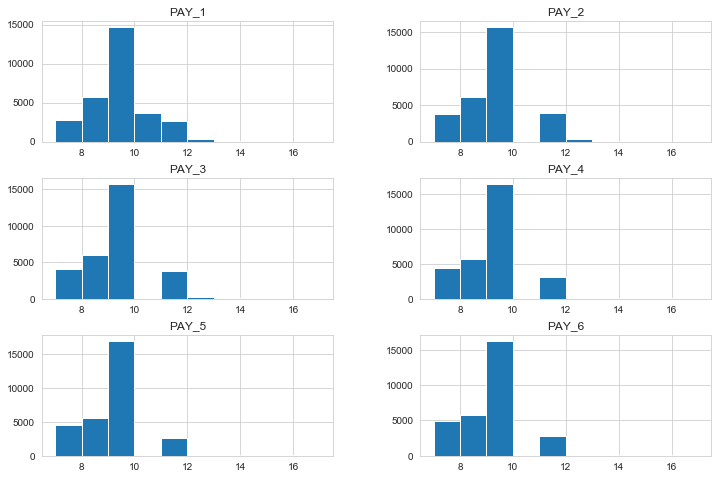

In [19]:
data.hist(column= repayments, figsize=(12, 8))

### Model Building


In [20]:
bill_amounts_binned = ['BILL_AMT1_BINNED', 'BILL_AMT2_BINNED', 'BILL_AMT3_BINNED', 'BILL_AMT4_BINNED', 'BILL_AMT5_BINNED', 'BILL_AMT6_BINNED']
payments_binned = ['PAY_AMT1_BINNED', 'PAY_AMT2_BINNED', 'PAY_AMT3_BINNED', 'PAY_AMT4_BINNED', 'PAY_AMT5_BINNED', 'PAY_AMT6_BINNED']          
features=['LIMIT_BAL_BINNED','SEX','EDUCATION','MARRIAGE','AGE_encoded'] + repayments + bill_amounts_binned + payments_binned
X=data[features]
y=data['def_pay']

In [21]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB
#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

### Model Evaluation

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,auc
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,cross_val_predict

In [23]:
# Accuracy from cross validation 
# import cross validation
score = cross_val_score(mnb,X,y,cv=10)
accuracy_1 = score.mean()
accuracy_1

0.7787999999999999

In [24]:
# get predicted class for y
y_pred_class = cross_val_predict(mnb,X,y,cv=10)

In [25]:
pred_proba = cross_val_predict(mnb, X,y,cv=10, method = 'predict_proba')
pred_proba

array([[0.76124393, 0.23875607],
       [0.78001734, 0.21998266],
       [0.78680811, 0.21319189],
       ...,
       [0.71430395, 0.28569605],
       [0.72902801, 0.27097199],
       [0.72854513, 0.27145487]])

In [26]:
cmat = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print()
print("Classification Report:","\n", classification_report(y, y_pred_class,zero_division=0))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Confusion Matrix: 
 [[23364     0]
 [ 6636     0]]
TP - True Negative 23364
FP - False Positive 0
FN - False Negative 6636
TP - True Positive 0

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     23364
           1       0.00      0.00      0.00      6636

    accuracy                           0.78     30000
   macro avg       0.39      0.50      0.44     30000
weighted avg       0.61      0.78      0.68     30000

Accuracy Rate: 0.7788
Misclassification Rate: 0.2212


In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_1, tpr_1, thresholds = roc_curve(y, pred_proba[:,1], pos_label=1)

In [28]:
# Area under ROC curve
roc_auc_1=auc(fpr_1,tpr_1)
roc_auc_1

0.679815102089024

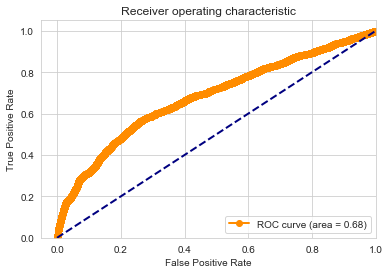

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr_1, tpr_1, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Second Trial : Data Binning with Equal Intervals + Data Normalization 
## (\*Best Performance\*)

From the 1st trial, we see that the model classify all instances as negative and has the same performance as the benchmark model, majority-class prediction.We suspect that this situation may have occurred because some numeracial data are skewed, and are concentrated in one or two intervals when binned, thus have low impact on the predicted probability. To address this problem, we tried 2 methods:
<ol>
    <li>
        Normalize skewed data by log normalization before binning
    </li>
    <li>
        Use data binning with equal quantity instances in each interval
    </li>
</ol>

In [30]:
data = pd.read_csv('data/data_clean.csv',index_col = 'ID')

#### 1. Age

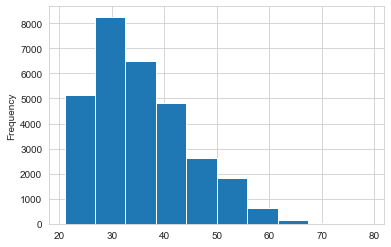

In [31]:
data['AGE'].plot(kind='hist')

In [32]:
# Normalize age data
# from sklearn.preprocessing import PowerTransformer
# log = PowerTransformer()
# log.fit(data[['AGE']])
# data['AGE'] =log.transform(data[['AGE']])

In [33]:
# data['AGE'].plot(kind='hist')

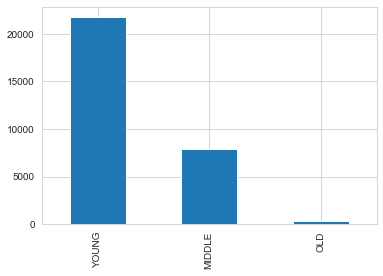

In [34]:
# binning of age
group_age=['YOUNG','MIDDLE','OLD']
data['AGE_BINNED']=pd.cut(data['AGE'],3,labels=group_age)
data['AGE_BINNED'].value_counts().plot(kind='bar')

In [35]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [36]:
data['AGE_encoded'] = le.fit_transform(data['AGE_BINNED'])

#### 2. Balance Limit

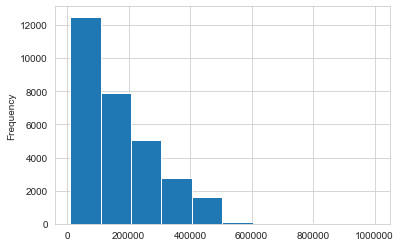

In [37]:
data['LIMIT_BAL'].plot(kind='hist')

In [38]:
# Normalize Balance Limit data
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
log.fit(data[['LIMIT_BAL']])
data['LIMIT_BAL_log'] =log.transform(data[['LIMIT_BAL']])

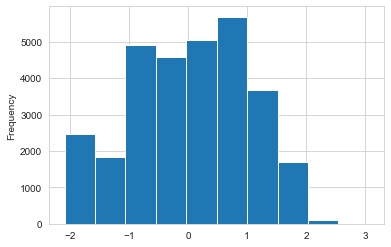

In [39]:
data['LIMIT_BAL_log'].plot(kind='hist')

In [40]:
pd.cut(data['LIMIT_BAL_log'], bins=5).value_counts()

(-0.033, 1.0]       10723
(-1.066, -0.033]     9501
(1.0, 2.033]         5345
(-2.104, -1.066]     4311
(2.033, 3.066]        120
Name: LIMIT_BAL_log, dtype: int64

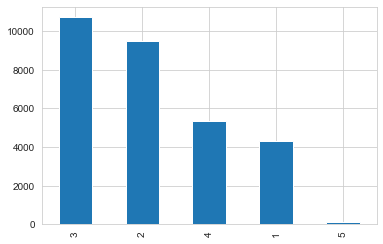

In [41]:
# binning of Balance Limit
data['LIMIT_BAL_BINNED']=pd.cut(data['LIMIT_BAL_log'],5,labels=range(1,6))
data['LIMIT_BAL_BINNED'].value_counts().plot(kind='bar')

#### 3. Previous Panyments

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a257767d0>,
      dtype=object)

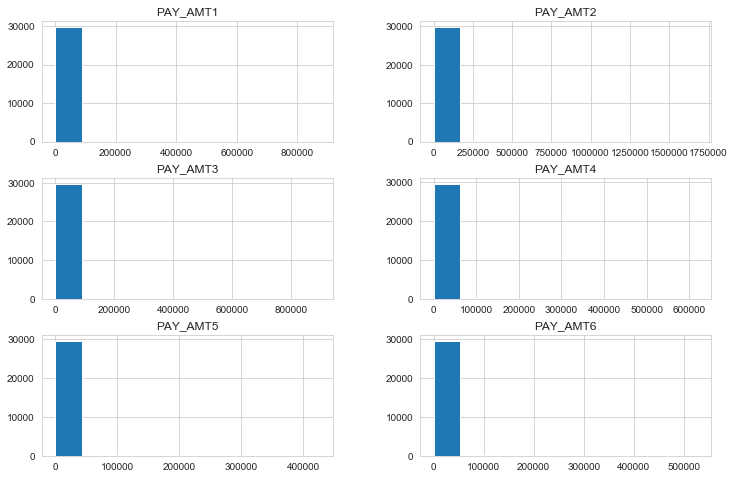

In [42]:
# histogram for preious payments
data.hist(column= payments, figsize=(12, 8))

In [43]:
# Normalize previous payments data
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
for x in payments:
    log.fit(data[[x]])
    data[x] =log.transform(data[[x]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22af8b50>,
      dtype=object)

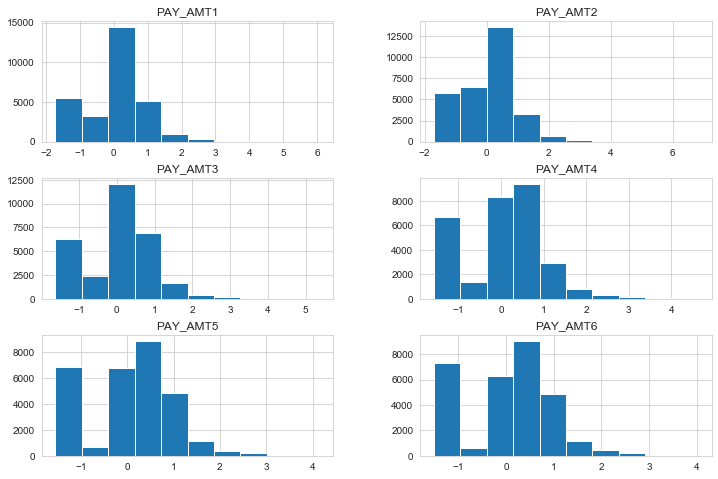

In [44]:
data.hist(column= payments, figsize=(12, 8))

In [45]:
pd.cut(data['PAY_AMT1'], bins=5).value_counts()

(-0.164, 1.396]     19686
(-1.732, -0.164]     8747
(1.396, 2.957]       1394
(2.957, 4.517]        167
(4.517, 6.077]          6
Name: PAY_AMT1, dtype: int64

In [46]:
# binning of previous payments
for x in payments:
    data[x+'_BINNED']=pd.cut(data[x],5,labels=range(1,6))

#### 4. Bill Statements

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27b97450>,
      dtype=object)

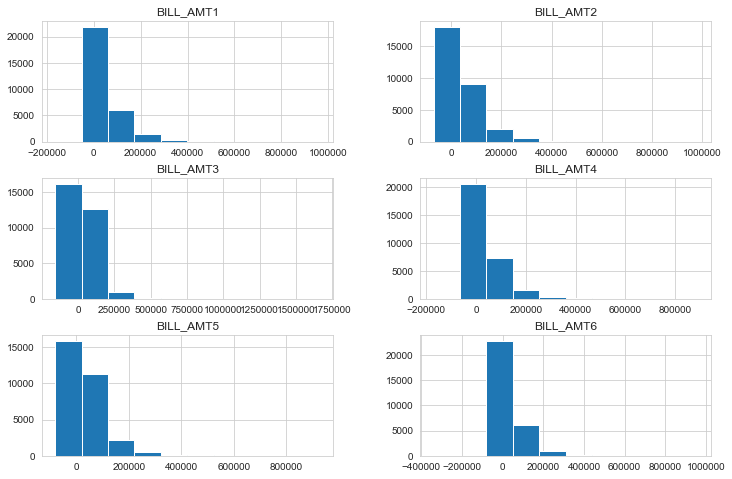

In [47]:
# histogram for bill statements
data.hist(column= bill_amounts, figsize=(12, 8))

In [48]:
# Normalize bill statements data
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
pt = PowerTransformer()
data[bill_amounts]=pt.fit_transform(data[bill_amounts])

In [49]:
pd.cut(data['BILL_AMT1'], bins=5).value_counts()

(-0.499, 9.749]       18221
(-10.747, -0.499]     11777
(-41.542, -31.243]        2
(-20.995, -10.747]        0
(-31.243, -20.995]        0
Name: BILL_AMT1, dtype: int64

In [50]:
# binning of bill statements
for x in bill_amounts:
    data[x+'_BINNED']=pd.cut(data[x],5,labels=range(1,6))

#### 5. Repayments

In [51]:
# MutilinomialNB disallow negative input, add a constant to all repayments status value
data[repayments]=data[repayments]+9

### Model Building

In [52]:
bill_amounts_binned = ['BILL_AMT1_BINNED', 'BILL_AMT2_BINNED', 'BILL_AMT3_BINNED', 'BILL_AMT4_BINNED', 'BILL_AMT5_BINNED', 'BILL_AMT6_BINNED']
payments_binned = ['PAY_AMT1_BINNED', 'PAY_AMT2_BINNED', 'PAY_AMT3_BINNED', 'PAY_AMT4_BINNED', 'PAY_AMT5_BINNED', 'PAY_AMT6_BINNED']          
features=['LIMIT_BAL_BINNED','SEX','EDUCATION','MARRIAGE','AGE_encoded'] + repayments  + bill_amounts_binned + payments_binned
# features=['LIMIT_BAL_BINNED','SEX','EDUCATION','MARRIAGE','AGE_encoded','BILL_AMT1_BINNED','BILL_AMT3_BINNED','BILL_AMT4_BINNED',] + repayments + payments_binned
X=data[features]
y=data['def_pay']

In [53]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB
#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

### Model Evaluation

In [54]:
# Accuracy from cross validation 
score = cross_val_score(mnb,X,y,cv=10)
accuracy_2 = score.mean()
accuracy_2

0.7830666666666667

In [55]:
# get predicted class for y
y_pred_class = cross_val_predict(mnb,X,y,cv=10)

In [56]:
pred_proba = cross_val_predict(mnb, X,y,cv=10, method = 'predict_proba')
pred_proba

array([[0.58624711, 0.41375289],
       [0.70404356, 0.29595644],
       [0.8039037 , 0.1960963 ],
       ...,
       [0.62001414, 0.37998586],
       [0.83028935, 0.16971065],
       [0.76872499, 0.23127501]])

In [57]:
cmat = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TN - True Positive {}'.format(cmat[1,1]))
print()
print("Classification Report:","\n", classification_report(y, y_pred_class,zero_division=0))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Confusion Matrix: 
 [[23269    95]
 [ 6413   223]]
TP - True Negative 23269
FP - False Positive 95
FN - False Negative 6413
TN - True Positive 223

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     23364
           1       0.70      0.03      0.06      6636

    accuracy                           0.78     30000
   macro avg       0.74      0.51      0.47     30000
weighted avg       0.77      0.78      0.70     30000

Accuracy Rate: 0.7830666666666667
Misclassification Rate: 0.21693333333333334


In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_2, tpr_2, thresholds = roc_curve(y, pred_proba[:,1], pos_label=1)

In [59]:
# Area under ROC curve
roc_auc_2=auc(fpr_2,tpr_2)
roc_auc_2

0.7207268935304765

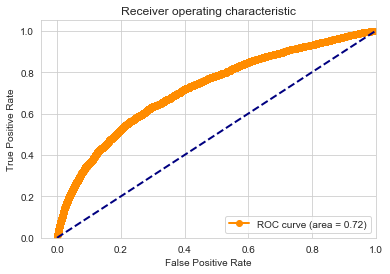

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr_2, tpr_2, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Third Trial : Data Binning with Equal Quantity of Instances in Each Interval

#### 1. Age

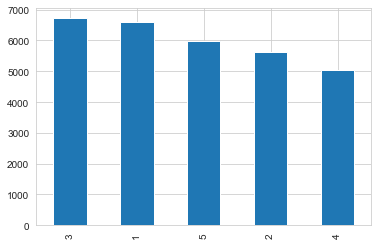

In [61]:
data = pd.read_csv('data/data_clean.csv',index_col = 'ID')
# binning of age
data['AGE_BINNED']=pd.qcut(data['AGE'],5,labels=range(1,6))
data['AGE_BINNED'].value_counts().plot(kind='bar')

In [62]:
data['AGE_BINNED'].value_counts()

3    6728
1    6604
5    5986
2    5626
4    5056
Name: AGE_BINNED, dtype: int64

In [63]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()

In [64]:
data['AGE_encoded'] = le.fit_transform(data['AGE_BINNED'])

#### 2. Balance Limit

In [65]:
pd.qcut(data['LIMIT_BAL'],5).value_counts()

(9999.999, 50000.0]      7676
(100000.0, 180000.0]     6123
(270000.0, 1000000.0]    5958
(180000.0, 270000.0]     5421
(50000.0, 100000.0]      4822
Name: LIMIT_BAL, dtype: int64

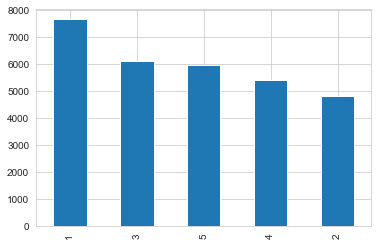

In [66]:
# binning of Balance Limit
data['LIMIT_BAL_BINNED']=pd.qcut(data['LIMIT_BAL'],5,labels=range(1,6))
data['LIMIT_BAL_BINNED'].value_counts().plot(kind='bar')

#### 3. Previous Payments

In [67]:
# binning of previous payments
for x in payments:
    data[x+'_BINNED']=pd.qcut(data[x],4,labels=range(1,5))

#### 4. Bill Statement

In [68]:
# binning of bill statements
for x in bill_amounts:
    data[x+'_BINNED']=pd.qcut(data[x],5,labels=range(1,6))

####  5.Repayments


In [69]:
data[repayments]=data[repayments]+9

### Model Building

In [70]:
bill_amounts_binned = ['BILL_AMT1_BINNED', 'BILL_AMT2_BINNED', 'BILL_AMT3_BINNED', 'BILL_AMT4_BINNED', 'BILL_AMT5_BINNED', 'BILL_AMT6_BINNED']
payments_binned = ['PAY_AMT1_BINNED', 'PAY_AMT2_BINNED', 'PAY_AMT3_BINNED', 'PAY_AMT4_BINNED', 'PAY_AMT5_BINNED', 'PAY_AMT6_BINNED']          
features=['LIMIT_BAL_BINNED','SEX','EDUCATION','MARRIAGE','AGE_encoded'] + repayments + bill_amounts_binned + payments_binned
X=data[features]
y=data['def_pay']

In [71]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB
#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

### Model Evaluation

In [72]:
# Accuracy from cross validation 
# import cross validation
score = cross_val_score(mnb,X,y,cv=10)
accuracy_3 = score.mean()
accuracy_3

0.7825333333333333

In [73]:
# get predicted class for y
y_pred_class = cross_val_predict(mnb,X,y,cv=10)

In [74]:
pred_proba = cross_val_predict(mnb, X,y,cv=10, method = 'predict_proba')
pred_proba

array([[0.32815668, 0.67184332],
       [0.61956725, 0.38043275],
       [0.74022607, 0.25977393],
       ...,
       [0.5846468 , 0.4153532 ],
       [0.86092321, 0.13907679],
       [0.65173003, 0.34826997]])

In [75]:
cmat = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TN - True Positive {}'.format(cmat[1,1]))
print()
print("Classification Report:","\n", classification_report(y, y_pred_class,zero_division=0))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Confusion Matrix: 
 [[22218  1146]
 [ 5378  1258]]
TP - True Negative 22218
FP - False Positive 1146
FN - False Negative 5378
TN - True Positive 1258

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87     23364
           1       0.52      0.19      0.28      6636

    accuracy                           0.78     30000
   macro avg       0.66      0.57      0.58     30000
weighted avg       0.74      0.78      0.74     30000

Accuracy Rate: 0.7825333333333333
Misclassification Rate: 0.21746666666666667


In [76]:
fpr_3, tpr_3, thresholds = roc_curve(y, pred_proba[:,1], pos_label=1)

In [77]:
# Area under ROC curve
roc_auc_3=auc(fpr_3,tpr_3)
roc_auc_3

0.684349390736164

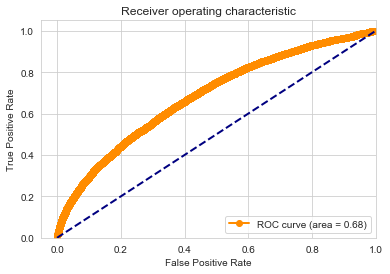

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr_3, tpr_3, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Comparison of the 3 trials

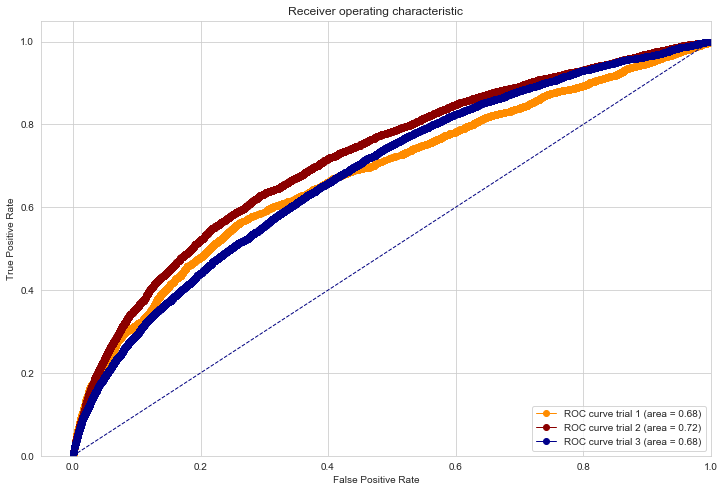

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
lw = 1
plt.plot(fpr_1, tpr_1, marker='o',color='darkorange',
         lw=lw, label='ROC curve trial 1 (area = %0.2f)' % roc_auc_1)
plt.plot(fpr_2, tpr_2, marker='o',color='darkred',
         lw=lw, label='ROC curve trial 2 (area = %0.2f)' % roc_auc_2)
plt.plot(fpr_3, tpr_3, marker='o',color='darkblue',
         lw=lw, label='ROC curve trial 3 (area = %0.2f)' % roc_auc_3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [80]:
# print the accurary rate
print("Accuracy of trial 1 Model:", accuracy_1)
print("Accuracy of trial 2 Model:", accuracy_2)
print("Accuracy of trial 3 Model:", accuracy_3)

Accuracy of trial 1 Model: 0.7787999999999999
Accuracy of trial 2 Model: 0.7830666666666667
Accuracy of trial 3 Model: 0.7825333333333333


# Method 2 : View All Categorical Features as Numerical Features

In [81]:
data = pd.read_csv('data/data_clean.csv',index_col = 'ID')
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


### Normalize skewed features

In [82]:
# Balance Limit
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
log.fit(data[['LIMIT_BAL']])
data['LIMIT_BAL_log'] =log.transform(data[['LIMIT_BAL']])

In [83]:
# Payments Amounts
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
for x in payments:
    log.fit(data[[x]])
    data[x] =log.transform(data[[x]])

### Rescale the features
To reduce the impact of data scale, we applied min-max scaling on all features.

In [84]:
# normalization of certain numerical features
features = ['LIMIT_BAL_log','SEX','EDUCATION','MARRIAGE','AGE']+ repayments + bill_amounts + payments

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data[features])
data[features] = scaler.transform(data[features])
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,LIMIT_BAL_log
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,1.0,0.333333,0.0,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.080648,0.260979,0.000000,0.159061,0.000000,0.000000,0.000000,0.000000,1,0.083943
2,120000.0,1.0,0.333333,0.5,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.084074,0.263485,0.000000,0.176066,0.221148,0.255703,0.000000,0.332945,1,0.388897
3,90000.0,1.0,0.333333,0.5,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.095470,0.272928,0.212766,0.196107,0.221148,0.255703,0.275844,0.406723,0,0.329583
4,50000.0,1.0,0.333333,0.0,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.109363,0.283685,0.229178,0.211883,0.231696,0.261778,0.280411,0.283774,0,0.221696
5,50000.0,0.0,0.333333,0.0,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.099633,0.275681,0.229178,0.428138,0.384782,0.424597,0.251294,0.258557,0,0.221696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,0.0,0.666667,0.0,0.310345,0.2,0.2,0.2,0.2,0.2,...,0.111622,0.273259,0.333305,0.371799,0.327984,0.333366,0.401993,0.283774,0,0.529848
29997,150000.0,0.0,0.666667,0.5,0.379310,0.1,0.1,0.1,0.1,0.2,...,0.085794,0.260979,0.224014,0.244192,0.375642,0.146789,0.000000,0.000000,0,0.438150
29998,30000.0,0.0,0.333333,0.5,0.275862,0.6,0.5,0.4,0.1,0.2,...,0.101057,0.275854,0.000000,0.000000,0.459037,0.358647,0.325934,0.366912,1,0.140761


### Model Building

In [85]:
# define independent attributes 
features = ['LIMIT_BAL_log','SEX','EDUCATION','MARRIAGE','AGE']+ repayments + bill_amounts + payments

# assign values for independent variables and target variable ('Personal Loan')
X = data [features]
y = data ['def_pay']

In [86]:
#Import Gaussian Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Naive Bayes Classifier
gnb = GaussianNB()

### Model Evaluation

In [87]:
# Accuracy from cross validation 
# import cross validation
score = cross_val_score(gnb,X,y,cv=10)
score.mean()

0.7837

In [88]:
# get predicted class for y
y_pred_class = cross_val_predict(gnb,X,y,cv=10)
y_pred_class

array([1, 1, 0, ..., 1, 0, 0])

In [89]:
pred_proba = cross_val_predict(gnb, X,y,cv=10, method = 'predict_proba')
pred_proba

array([[1.17820252e-02, 9.88217975e-01],
       [2.17122286e-01, 7.82877714e-01],
       [9.77717717e-01, 2.22822832e-02],
       ...,
       [5.45968898e-05, 9.99945403e-01],
       [9.89413026e-01, 1.05869742e-02],
       [9.54135917e-01, 4.58640833e-02]])

In [90]:
cmat = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TN - True Positive {}'.format(cmat[1,1]))
print()
print("Classification Report:","\n", classification_report(y, y_pred_class,zero_division=0))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Confusion Matrix: 
 [[20297  3067]
 [ 3422  3214]]
TP - True Negative 20297
FP - False Positive 3067
FN - False Negative 3422
TN - True Positive 3214

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86     23364
           1       0.51      0.48      0.50      6636

    accuracy                           0.78     30000
   macro avg       0.68      0.68      0.68     30000
weighted avg       0.78      0.78      0.78     30000

Accuracy Rate: 0.7837
Misclassification Rate: 0.2163


In [91]:
fpr, tpr, thresholds = roc_curve(y, pred_proba[:,1], pos_label=1)

In [92]:
# Area under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.7501657438031071

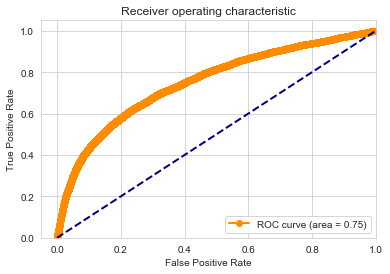

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Method 3 : Use GaussianNB for Continuous Features and MultinomialNB for Categorical Features respectively

In [94]:
data = pd.read_csv('data/data_clean.csv',index_col = 'ID')

### GaussianNB for Continuous Features

In [95]:
# Balance Limit
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
log.fit(data[['LIMIT_BAL']])
data['LIMIT_BAL_log'] =log.transform(data[['LIMIT_BAL']])

In [96]:
# Payments Amounts
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
for x in payments:
    log.fit(data[[x]])
    data[x] =log.transform(data[[x]])

In [97]:
# Normalize bill statements data
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
pt = PowerTransformer()
data[bill_amounts]=pt.fit_transform(data[bill_amounts])

In [98]:
# define independent attributes 
features1=['LIMIT_BAL','AGE'] + bill_amounts + payments

# assign values for independent variables and target variable ('Personal Loan')
X1 = data [features1]
y = data ['def_pay']

In [99]:
#Import Gaussian Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Naive Bayes Classifier
gnb = GaussianNB() 

In [100]:
# import cross validation
from sklearn.model_selection import cross_val_score,cross_val_predict
pred_proba1 = cross_val_predict(gnb, X1,y,cv=10, method = 'predict_proba')
pred_proba1

array([[0.66644638, 0.33355362],
       [0.7275644 , 0.2724356 ],
       [0.73301836, 0.26698164],
       ...,
       [0.71038116, 0.28961884],
       [0.74820979, 0.25179021],
       [0.70682081, 0.29317919]])

### MultinomialNB for Categorical Features

In [101]:
# MultinomialNB disallow negative input, add a constant to all repayments status value
data[repayments]=data[repayments]+9

In [102]:
# define independent attributes 
features2=['SEX','EDUCATION','MARRIAGE'] + repayments

# assign values for independent variables and target variable ('Personal Loan')
X2 = data [features2]
y = data ['def_pay']

In [103]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB
#Create a Multinomial Bayes Classifier
mnb = MultinomialNB()

In [104]:
pred_proba2 = cross_val_predict(mnb, X2,y,cv=10, method = 'predict_proba')
pred_proba2

array([[0.76036144, 0.23963856],
       [0.79679318, 0.20320682],
       [0.79472879, 0.20527121],
       ...,
       [0.74668855, 0.25331145],
       [0.76315466, 0.23684534],
       [0.7627128 , 0.2372872 ]])

### Multiply Class Assignment Probabilities

In [105]:
pred_proba=np.zeros((30000,2))
for x in range(0,30000):
    pred_proba[x][0]=pred_proba2[x][0]*pred_proba1[x][0]
    pred_proba[x][1]=pred_proba2[x][1]*pred_proba1[x][1]

In [106]:
pred_proba

array([[0.50674013, 0.07993231],
       [0.57971835, 0.05536077],
       [0.58255079, 0.05480365],
       ...,
       [0.53043347, 0.07336377],
       [0.57099978, 0.05963534],
       [0.53910128, 0.06956767]])

In [107]:
y_pred_class=[]
for x in range(0,30000):
    if pred_proba[x][0] > pred_proba[x][1]:
        y_pred_class.append(0)
    else:
        y_pred_class.append(1)

### Model Evaluation

In [108]:
cmat = confusion_matrix(y, y_pred_class)
print("Confusion Matrix:", "\n", confusion_matrix(y, y_pred_class))
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TN - True Positive {}'.format(cmat[1,1]))
print()
print("Classification Report:","\n", classification_report(y, y_pred_class,zero_division=0))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Confusion Matrix: 
 [[23364     0]
 [ 6636     0]]
TP - True Negative 23364
FP - False Positive 0
FN - False Negative 6636
TN - True Positive 0

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     23364
           1       0.00      0.00      0.00      6636

    accuracy                           0.78     30000
   macro avg       0.39      0.50      0.44     30000
weighted avg       0.61      0.78      0.68     30000

Accuracy Rate: 0.7788
Misclassification Rate: 0.2212


In [109]:
fpr, tpr, thresholds = roc_curve(y, pred_proba[:,1], pos_label=1)

In [110]:
# Area under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.6552818362515852

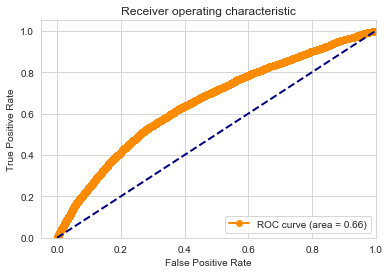

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()